In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
np.random.seed(42)
n_users = 1000;

In [25]:
data = pd.DataFrame({
    "sessions_per_weak": np.random.gamma(shape=2.0,scale=2.0,size=n_users),
    "avg_session_duration": np.random.normal(loc=20, scale=8,size=n_users),
    "actions_per_session": np.random.poisson(lam=15,size=n_users),
    "days_since_last_activity": np.random.exponential(scale=10,size=n_users),
    "active_days_ratio": np.random.beta(a=2,b=5,size=n_users),
    "total_sessions": np.random.gamma(shape=3.0,scale=10.0,size=n_users)
})
data.head()

,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions
0,4.787359,8.749460,12,2.722514,0.419851,9.295235
1,2.988929,19.335155,13,15.796611,0.244137,51.788786
2,2.764567,7.962237,12,6.664717,0.156314,36.349652
3,2.764605,26.080448,12,4.065340,0.432487,51.620098
4,9.299429,20.659518,17,1.129683,0.529015,31.305994


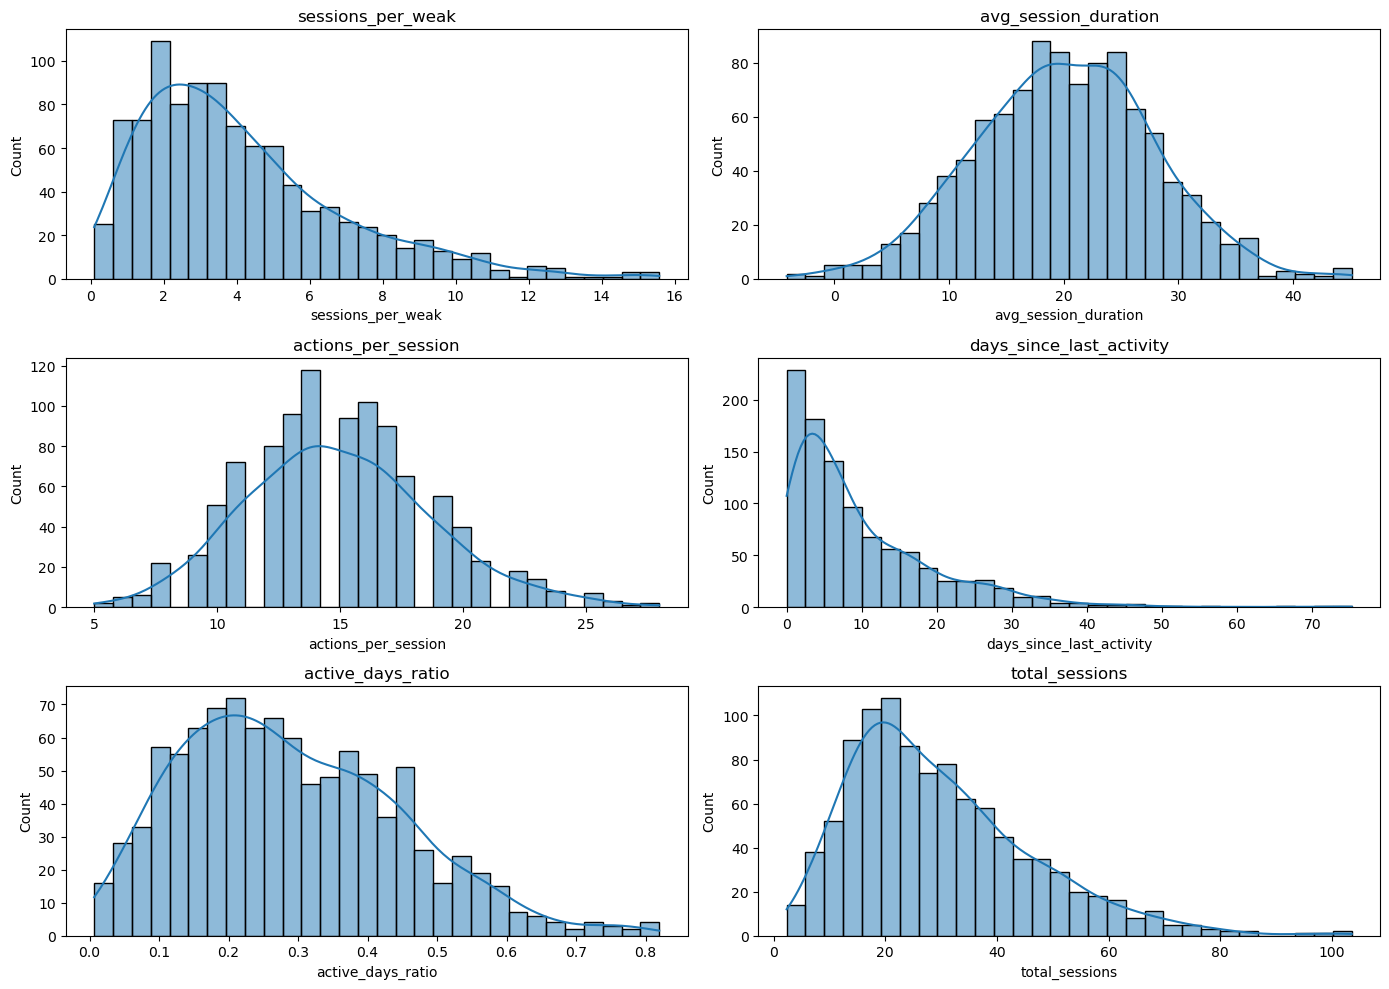

In [26]:


plt.figure(figsize=(14, 10))

for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


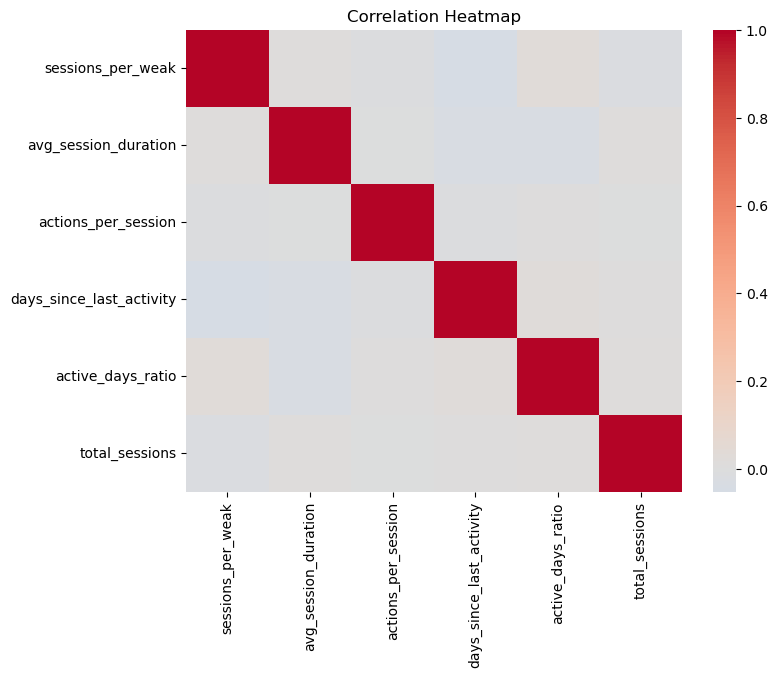

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), cmap='coolwarm',center=0,annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [30]:
data.describe()

,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.119861,20.110560,14.970000,9.804199,0.289476,29.745660
std,2.805714,7.763485,3.793612,9.869579,0.157468,16.266192
min,0.091838,-4.156097,5.000000,0.002410,0.006476,2.338531
25%,2.052423,14.858624,12.000000,2.761796,0.168013,17.861487
50%,3.458128,20.085345,15.000000,6.592864,0.268824,26.386626
75%,5.484315,25.328171,17.000000,14.124922,0.393941,38.488787
max,15.573781,45.101988,28.000000,75.252034,0.819733,103.558007


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(
    scaled_data,
    columns=data.columns
)

scaled_df.head()


,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions
0,0.238026,-1.464134,-0.783287,-0.717886,0.828367,-1.257864
1,-0.403283,-0.099928,-0.519554,0.607464,-0.288069,1.355828
2,-0.483289,-1.565586,-0.783287,-0.318256,-0.846068,0.406198
3,-0.483276,0.769355,-0.783287,-0.581760,0.908650,1.345452
4,1.847002,0.070746,0.535378,-0.879354,1.521956,0.095973


In [32]:
scaled_df.describe().round(2)


,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.44,-3.13,-2.63,-0.99,-1.80,-1.69
25%,-0.74,-0.68,-0.78,-0.71,-0.77,-0.73
50%,-0.24,-0.00,0.01,-0.33,-0.13,-0.21
75%,0.49,0.67,0.54,0.44,0.66,0.54
max,4.08,3.22,3.44,6.63,3.37,4.54


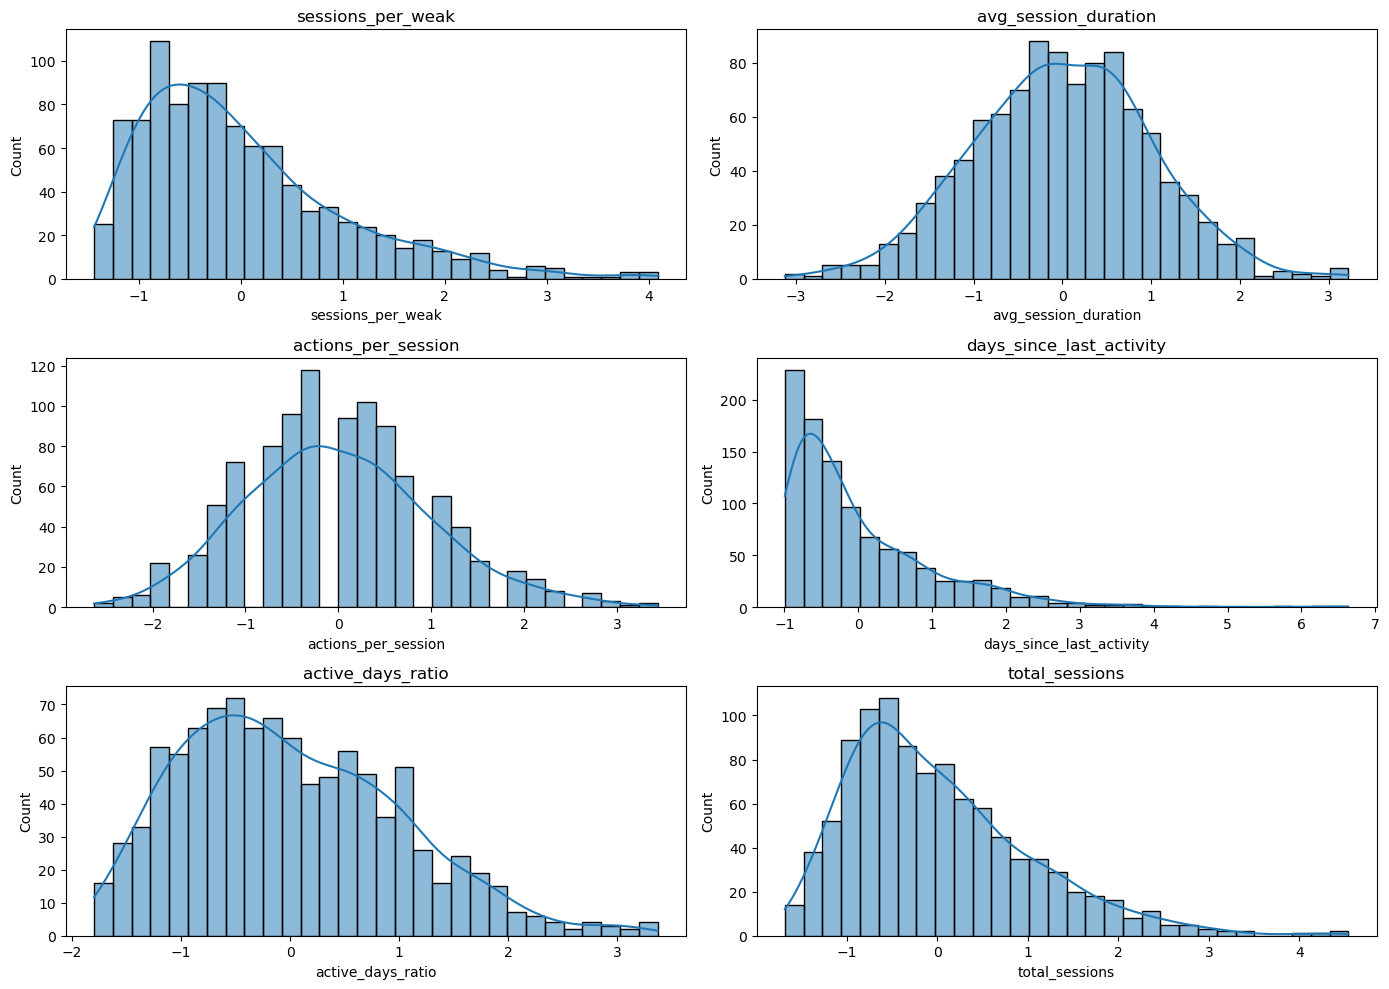

In [33]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(scaled_df.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(scaled_df[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

